In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("datasetsolar.csv")

In [3]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation'])

In [4]:
#df.loc[0]=df1.iloc[0]

In [5]:
df1.shape

(43800, 14)

In [136]:
import tensorflow as tf

In [6]:
#df.loc[0]=df1.iloc[0].tolist()

In [7]:
df1.shape

(43800, 14)

In [8]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2012,1,1,0,30,0,0,0,-5,10.796184,984.308411,31.520793,67.788605,3.121760
1,2012,1,1,1,30,0,0,0,-5,10.293036,984.200317,32.696968,66.973656,3.058262
2,2012,1,1,2,30,0,0,0,-5,9.844070,983.793335,33.539323,67.320267,2.979188
3,2012,1,1,3,30,0,0,0,-5,9.457603,983.602722,34.166898,70.372833,2.963390
4,2012,1,1,4,30,0,0,0,-5,9.112615,983.454895,34.658328,74.828423,2.998623


In [10]:
df1.columns=['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed']

In [11]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed
0,2012,1,1,0,30,0,0,0,-5,10.796184,984.308411,31.520793,67.788605,3.121760
1,2012,1,1,1,30,0,0,0,-5,10.293036,984.200317,32.696968,66.973656,3.058262
2,2012,1,1,2,30,0,0,0,-5,9.844070,983.793335,33.539323,67.320267,2.979188
3,2012,1,1,3,30,0,0,0,-5,9.457603,983.602722,34.166898,70.372833,2.963390
4,2012,1,1,4,30,0,0,0,-5,9.112615,983.454895,34.658328,74.828423,2.998623


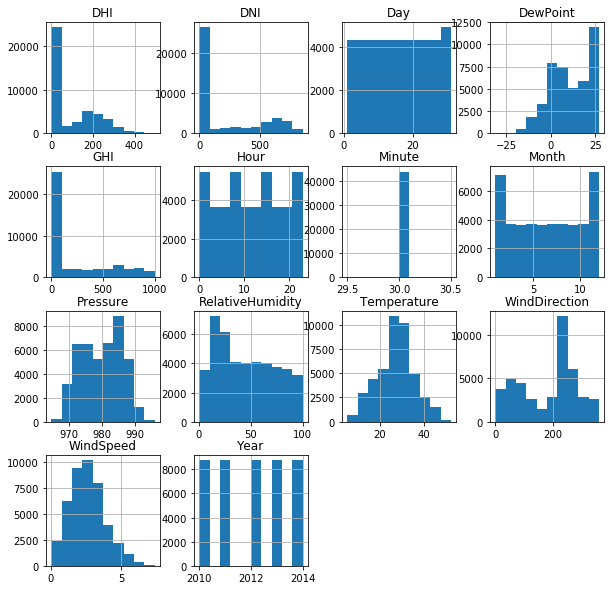

In [12]:
df1.hist(figsize=(10,10))
plt.show()

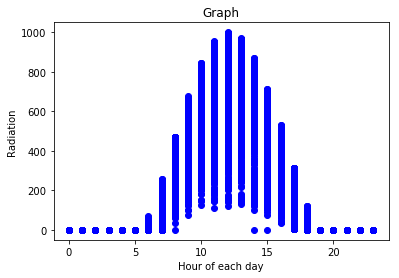

In [13]:
plt.scatter(df1.Hour,df1.GHI,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [107]:
i=0
k=0
while k<=43799:
    if(df1.iloc[i].Hour<6 or df1.iloc[i].Hour>18):
        df1=df1.drop(df1.index[i])
        i=i-1
    i=i+1
    k=k+1

In [14]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed
0,2012,1,1,0,30,0,0,0,-5,10.796184,984.308411,31.520793,67.788605,3.121760
1,2012,1,1,1,30,0,0,0,-5,10.293036,984.200317,32.696968,66.973656,3.058262
2,2012,1,1,2,30,0,0,0,-5,9.844070,983.793335,33.539323,67.320267,2.979188
3,2012,1,1,3,30,0,0,0,-5,9.457603,983.602722,34.166898,70.372833,2.963390
4,2012,1,1,4,30,0,0,0,-5,9.112615,983.454895,34.658328,74.828423,2.998623


In [15]:
df1=df1.drop(['Year'],axis=1)

In [16]:
df1=df1.drop(['WindDirection'],axis=1)

In [17]:
df1=df1.drop(['Month'],axis=1)

In [18]:
df1=df1.drop(['Day'],axis=1)

In [19]:
df1=df1.drop(['Minute'],axis=1)

In [20]:
df1=df1.drop(['DHI'],axis=1)

In [21]:
df1=df1.drop(['DNI'],axis=1)

In [25]:
df1=df1.drop(['Hour'],axis=1)

In [26]:
df2=df1

In [27]:
df1.head()

,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
0,0,-5,10.796184,984.308411,31.520793,3.121760
1,0,-5,10.293036,984.200317,32.696968,3.058262
2,0,-5,9.844070,983.793335,33.539323,2.979188
3,0,-5,9.457603,983.602722,34.166898,2.963390
4,0,-5,9.112615,983.454895,34.658328,2.998623


In [28]:
df2.head()

,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
0,0,-5,10.796184,984.308411,31.520793,3.121760
1,0,-5,10.293036,984.200317,32.696968,3.058262
2,0,-5,9.844070,983.793335,33.539323,2.979188
3,0,-5,9.457603,983.602722,34.166898,2.963390
4,0,-5,9.112615,983.454895,34.658328,2.998623


In [29]:
from sklearn.model_selection import train_test_split

df1 = (df1 - df1.mean()) / (df1.max() - df1.min())

X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed','DewPoint']]


Y=df1.GHI

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

X1=df2[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed','DewPoint']]


Y1=df2.GHI

X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X1_train, Y1_train)
    x=prepared_model.score(X1_test,Y1_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X1_test) 

In [30]:
X_test.shape

(10950, 5)

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:
df1.shape

(43800, 6)

In [33]:
df1.head()

,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
0,-0.235297,-0.271606,-0.348001,0.138924,-0.141665,0.069799
1,-0.235297,-0.271606,-0.358607,0.135472,-0.129848,0.061191
2,-0.235297,-0.271606,-0.368072,0.122474,-0.121386,0.050472
3,-0.235297,-0.271606,-0.376219,0.116386,-0.115081,0.048330
4,-0.235297,-0.271606,-0.383492,0.111665,-0.110144,0.053106


In [34]:
df2.head()

,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
0,0,-5,10.796184,984.308411,31.520793,3.121760
1,0,-5,10.293036,984.200317,32.696968,3.058262
2,0,-5,9.844070,983.793335,33.539323,2.979188
3,0,-5,9.457603,983.602722,34.166898,2.963390
4,0,-5,9.112615,983.454895,34.658328,2.998623


In [35]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
Target_predicted= linreg.predict(X_test) 

Score:  0.510885515648


In [36]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['GHI'] = Target_predicted
sub.to_csv('finalsubmission.csv',index=False)

In [37]:
df2.head()

,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
0,0,-5,10.796184,984.308411,31.520793,3.121760
1,0,-5,10.293036,984.200317,32.696968,3.058262
2,0,-5,9.844070,983.793335,33.539323,2.979188
3,0,-5,9.457603,983.602722,34.166898,2.963390
4,0,-5,9.112615,983.454895,34.658328,2.998623


In [38]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

model_score_error(MLP)

Score:  0.565723554197


In [29]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission1MLP.csv',index=False)